# > B-TECH PROJECT 
## --> SEMESTER - 6

# > TITLE - FACIAL MASK DETECTION 

# GROUP MEMBERS :

## --> ARUN PRAKASH
## --> VISHNU DINESH
## --> AMAL DASAN
## --> KISHAN RAO

## > TRAINING THE MACHINE USING DEEP LEARNING ALGORITHEM (CNN)

In [1]:
# import the necessary packages
# Main modules - keras(for deep learning) , tensorflow(deep learning) , numpy(math , matrix) , sklearn (prediction)
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# importing the dataset form machine

dataset='/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/dataset'
imagePaths=list(paths.list_images(dataset))

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images

In [3]:
data=[]
labels=[]

In [4]:
for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [5]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [6]:
data

array([[[[-0.654902  , -0.7647059 , -0.7882353 ],
         [-0.654902  , -0.7647059 , -0.7882353 ],
         [-0.654902  , -0.7647059 , -0.7882353 ],
         ...,
         [-0.60784316, -0.6862745 , -0.69411767],
         [-0.60784316, -0.6862745 , -0.69411767],
         [-0.6156863 , -0.69411767, -0.7019608 ]],

        [[-0.6627451 , -0.77254903, -0.79607844],
         [-0.6627451 , -0.77254903, -0.79607844],
         [-0.6627451 , -0.77254903, -0.79607844],
         ...,
         [-0.6156863 , -0.69411767, -0.7019608 ],
         [-0.6156863 , -0.69411767, -0.7019608 ],
         [-0.62352943, -0.7019608 , -0.70980394]],

        [[-0.6784314 , -0.7882353 , -0.8117647 ],
         [-0.67058825, -0.78039217, -0.8039216 ],
         [-0.67058825, -0.78039217, -0.8039216 ],
         ...,
         [-0.62352943, -0.7019608 , -0.70980394],
         [-0.62352943, -0.7019608 , -0.70980394],
         [-0.6392157 , -0.7176471 , -0.7254902 ]],

        ...,

        [[-0.01960784, -0.38823527, -0

In [7]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [8]:
# perform one-hot encoding on the labels

lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)

In [9]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [10]:
# construct the training image generator for data augmentation
# creates mupliple images from a single image 

aug=ImageDataGenerator(rotation_range=20,
                       zoom_range=0.15,         # rotate , flip , mirror , zoom
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.15,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest')

In [12]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [13]:
print(baseModel.summary())

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [14]:
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [15]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [16]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

In [17]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [22]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
learning_rate=0.001
Epochs=20
BS=12

In [23]:
# compile our model
print("[INFO] compiling model...")
opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

[INFO] compiling model...


In [24]:
# train the head of the network
print("[INFO] training head...")
H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs)

[INFO] training head...
Train for 255 steps, validate on 767 samples
Epoch 1/20
255/255 [==============================] - 130s 510ms/step - loss: 0.3702 - accuracy: 0.8386 - val_loss: 0.3579 - val_accuracy: 0.8677
Epoch 2/20
255/255 [==============================] - 126s 495ms/step - loss: 0.2593 - accuracy: 0.8946 - val_loss: 0.3319 - val_accuracy: 0.8730
Epoch 3/20
255/255 [==============================] - 124s 486ms/step - loss: 0.2015 - accuracy: 0.9172 - val_loss: 0.2699 - val_accuracy: 0.9048
Epoch 4/20
255/255 [==============================] - 124s 486ms/step - loss: 0.1923 - accuracy: 0.9204 - val_loss: 0.3203 - val_accuracy: 0.8929
Epoch 5/20
255/255 [==============================] - 124s 487ms/step - loss: 0.1858 - accuracy: 0.9227 - val_loss: 0.4504 - val_accuracy: 0.8664
Epoch 6/20
255/255 [==============================] - 125s 489ms/step - loss: 0.1885 - accuracy: 0.9221 - val_loss: 0.8745 - val_accuracy: 0.8188
Epoch 7/20
255/255 [==============================] - 1

In [25]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(test_X, batch_size=BS)

[INFO] evaluating network...


In [26]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [27]:

print(classification_report(test_Y.argmax(axis=1),predIdxs,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      0.70      0.82       383
without_mask       0.77      0.99      0.87       384

    accuracy                           0.85       767
   macro avg       0.88      0.85      0.84       767
weighted avg       0.88      0.85      0.84       767



In [28]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


In [29]:
# plot the training loss and accuracy
N = EPOCHS

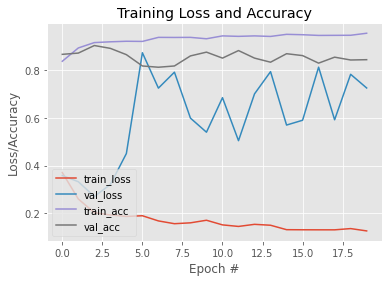

In [31]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [32]:
plt.savefig("/Users/vishnudinesh/Desktop/6th sem btech project/face mask detection/plot.png")

<Figure size 432x288 with 0 Axes>

In [33]:
# training of the machine is done now lets go for testing......